### Work on "https://www.youtube.com/results?search_query=schafer5"

In [1]:
import re #module provides regular expression support.
import os
import pandas as pd
from datetime import timedelta

from googleapiclient.discovery import build

from config import YOUTUBE_API_KEY

api_version = "v3"

youtube = build("youtube", api_version, developerKey=YOUTUBE_API_KEY)




In [2]:
request = youtube.channels().list(
    
    part='contentDetails,statistics',
    forUsername='schafer5'

)


In [3]:

response = request.execute()
print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'ozZM8hjeUZim7JBr9avCoVX5uIw', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'T2N6XiFZZxPbR6XaXMN2cENxtYs', 'id': 'UCCezIgC97PvUuR4_gbFUs5g', 'contentDetails': {'relatedPlaylists': {'likes': '', 'uploads': 'UUCezIgC97PvUuR4_gbFUs5g'}}, 'statistics': {'viewCount': '91536115', 'subscriberCount': '1250000', 'hiddenSubscriberCount': False, 'videoCount': '232'}}]}


In [4]:
pl_request = youtube.playlists().list(
    
    part='contentDetails,snippet',
    channelId='UCCezIgC97PvUuR4_gbFUs5g'

)
pl_response = pl_request.execute()
print(pl_response)


{'kind': 'youtube#playlistListResponse', 'etag': 'lNpwpV7t8rza4L5hvAkPDgvOYLc', 'nextPageToken': 'CAUQAA', 'pageInfo': {'totalResults': 21, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#playlist', 'etag': 'qIdd8wCVgQOMhzTyggaBTFhGnvk', 'id': 'PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS', 'snippet': {'publishedAt': '2020-01-08T16:44:09Z', 'channelId': 'UCCezIgC97PvUuR4_gbFUs5g', 'title': 'Pandas Tutorials', 'description': '', 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/mqdefault.jpg', 'width': 320, 'height': 180}, 'high': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/hqdefault.jpg', 'width': 480, 'height': 360}, 'standard': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/sddefault.jpg', 'width': 640, 'height': 480}, 'maxres': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/maxresdefault.jpg', 'width': 1280, 'height': 720}}, 'channelTitle': 'Corey Schafer', 'localized': {'title': '

In [5]:
print(pl_response)

{'kind': 'youtube#playlistListResponse', 'etag': 'lNpwpV7t8rza4L5hvAkPDgvOYLc', 'nextPageToken': 'CAUQAA', 'pageInfo': {'totalResults': 21, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#playlist', 'etag': 'qIdd8wCVgQOMhzTyggaBTFhGnvk', 'id': 'PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS', 'snippet': {'publishedAt': '2020-01-08T16:44:09Z', 'channelId': 'UCCezIgC97PvUuR4_gbFUs5g', 'title': 'Pandas Tutorials', 'description': '', 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/mqdefault.jpg', 'width': 320, 'height': 180}, 'high': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/hqdefault.jpg', 'width': 480, 'height': 360}, 'standard': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/sddefault.jpg', 'width': 640, 'height': 480}, 'maxres': {'url': 'https://i.ytimg.com/vi/ZyhVh-qRZPA/maxresdefault.jpg', 'width': 1280, 'height': 720}}, 'channelTitle': 'Corey Schafer', 'localized': {'title': '

In [6]:
pl_request = youtube.playlistItems().list(
    
    part='contentDetails',
    playlistId='PL-osiE80TeTvviVL0pJGX5mZCo7CAvIuf'

)
pl_response = pl_request.execute()
print(pl_response)


{'kind': 'youtube#playlistItemListResponse', 'etag': '17QUxa3m7CYIKtmZgXs_Yw_T5fw', 'nextPageToken': 'EAAajQFQVDpDQVVpRURFeVJVWkNNMEl4UXpVM1JFVTBSVEVvQVVqZW9zcWV2WW41QWxBQldrUWlRMmxLVVZSRE1YWmpNbXhHVDBSQ1ZWcFdVakprYld4WFZFUkNkMU5yWkZsT1Z6RmhVVEk0TTFFd1JqSlRXRlp0UldkelNUSTBXR3RzWjFsUmMwcExhMFJCSWc', 'items': [{'kind': 'youtube#playlistItem', 'etag': '2SA75GQ6MYriifuD3BRsz8wQ1oc', 'id': 'UEwtb3NpRTgwVGVUdnZpVkwwcEpHWDVtWkNvN0NBdkl1Zi41NkI0NEY2RDEwNTU3Q0M2', 'contentDetails': {'videoId': 'TtIJEQ6D9DE', 'videoPublishedAt': '2017-09-19T16:30:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'slGI8XegQ4UhlSQsE4eA6fO191E', 'id': 'UEwtb3NpRTgwVGVUdnZpVkwwcEpHWDVtWkNvN0NBdkl1Zi4wOTA3OTZBNzVEMTUzOTMy', 'contentDetails': {'videoId': 'N4WSqXtd_rk', 'videoPublishedAt': '2016-11-15T17:30:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': '8lYDvvDrQl_0tpX-uDnlfMFvC3g', 'id': 'UEwtb3NpRTgwVGVUdnZpVkwwcEpHWDVtWkNvN0NBdkl1Zi4wMTcyMDhGQUE4NTIzM0Y5', 'contentDetails': {'videoId': 'QGy6M8HZSC4', 'videoPublish

In [7]:
for item in pl_response['items']:
    video_id =item['contentDetails']['videoId']
    print(video_id)


TtIJEQ6D9DE
N4WSqXtd_rk
QGy6M8HZSC4
HfABu4aCI3U
DEwgZNC-KyE


In [8]:
video_ids= []
for item in pl_response['items']:
    video_ids.append(item['contentDetails']['videoId'])


print(','.join(video_ids))


TtIJEQ6D9DE,N4WSqXtd_rk,QGy6M8HZSC4,HfABu4aCI3U,DEwgZNC-KyE


In [9]:
video_request= youtube.videos().list(
    part = "contentDetails",
    id=','.join(video_ids)
    )
video_response = video_request.execute()

In [10]:
for item in video_response['items']:
    print(item)
    

{'kind': 'youtube#video', 'etag': 'Sd_JF9RuIR6oM54EgAImnQAcqD8', 'id': 'TtIJEQ6D9DE', 'contentDetails': {'duration': 'PT11M4S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': True, 'contentRating': {}, 'projection': 'rectangular'}}
{'kind': 'youtube#video', 'etag': 'TSyYGIFiU3T4F4PVIpdYYIZVqGQ', 'id': 'N4WSqXtd_rk', 'contentDetails': {'duration': 'PT16M55S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': True, 'contentRating': {}, 'projection': 'rectangular'}}
{'kind': 'youtube#video', 'etag': 'YJ2N8y_a2P1Vmw2fiBoYN6UaaKM', 'id': 'QGy6M8HZSC4', 'contentDetails': {'duration': 'PT23M59S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': True, 'contentRating': {}, 'projection': 'rectangular'}}
{'kind': 'youtube#video', 'etag': 'L5R27FmZM7yOIDKW9CeOACs-88M', 'id': 'HfABu4aCI3U', 'contentDetails': {'duration': 'PT13M51S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': Tr

In [11]:
#chech their time
for item in video_response['items']:
    duration =item['contentDetails']['duration']
    
    print(duration)
    

PT11M4S
PT16M55S
PT23M59S
PT13M51S
PT22M55S


In [12]:
#for understanding better I convert to them as  hours minutes and seconds
hours_pattern = re.compile(r'(\d+)H')
minutes_pattern = re.compile(r'(\d+)M')
seconds_pattern = re.compile(r'(\d+)S')
for item in video_response['items']:
    duration =item['contentDetails']['duration']
    
    hours=hours_pattern.search(duration)
    minutes=minutes_pattern.search(duration)
    seconds=seconds_pattern.search(duration)
    
    print(hours,minutes,seconds)
    





None <re.Match object; span=(2, 5), match='11M'> <re.Match object; span=(5, 7), match='4S'>
None <re.Match object; span=(2, 5), match='16M'> <re.Match object; span=(5, 8), match='55S'>
None <re.Match object; span=(2, 5), match='23M'> <re.Match object; span=(5, 8), match='59S'>
None <re.Match object; span=(2, 5), match='13M'> <re.Match object; span=(5, 8), match='51S'>
None <re.Match object; span=(2, 5), match='22M'> <re.Match object; span=(5, 8), match='55S'>


In [13]:
#after cheching their duration ,using minutes is better so show that 
hours_pattern = re.compile(r'(\d+)H')
minutes_pattern = re.compile(r'(\d+)M')
seconds_pattern = re.compile(r'(\d+)S')
for item in video_response['items']:
    duration =item['contentDetails']['duration']
    
    hours=hours_pattern.search(duration)
    minutes=minutes_pattern.search(duration)
    seconds=seconds_pattern.search(duration)
    minutes = int(minutes.group(1))
    
    print(minutes)
    

11
16
23
13
22


In [14]:
#show all time clearly
hours_pattern = re.compile(r'(\d+)H')
minutes_pattern = re.compile(r'(\d+)M')
seconds_pattern = re.compile(r'(\d+)S')
for item in video_response['items']:
    duration =item['contentDetails']['duration']
    
    hours=hours_pattern.search(duration)
    minutes=minutes_pattern.search(duration)
    seconds=seconds_pattern.search(duration)
    
    hours = int(hours.group(1)) if hours else 0
    minutes = int(minutes.group(1)) if minutes else 0
    seconds= int(seconds.group(1)) if seconds else 0
    
    print(hours,minutes,seconds)

0 11 4
0 16 55
0 23 59
0 13 51
0 22 55


In [15]:
#see total seconds
video_seconds = timedelta(
    hours=hours,
    minutes= minutes,
    seconds = seconds
    
).total_seconds()
print(video_seconds)

1375.0


In [16]:
nextPageToken= None
while True:
        pl_request = youtube.playlistItems().list(
        
        part='contentDetails',
        playlistId='PL-osiE80TeTvviVL0pJGX5mZCo7CAvIuf',
        maxResults=50,
        pageToken = nextPageToken

    )
        pl_response = pl_request.execute()
        print(pl_response)
        video_ids= []
        for item in pl_response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        video_request= youtube.videos().list(
            part = "contentDetails",
            id=','.join(video_ids)
            )
        video_response = video_request.execute()
        hours_pattern = re.compile(r'(\d+)H')
        minutes_pattern = re.compile(r'(\d+)M')
        seconds_pattern = re.compile(r'(\d+)S')
        for item in video_response['items']:
            duration =item['contentDetails']['duration']
            
            hours=hours_pattern.search(duration)
            minutes=minutes_pattern.search(duration)
            seconds=seconds_pattern.search(duration)
            
            hours = int(hours.group(1)) if hours else 0
            minutes = int(minutes.group(1)) if minutes else 0
            seconds= int(seconds.group(1)) if seconds else 0
            
            print(hours,minutes,seconds) 
            video_seconds = timedelta(
            hours=hours,
            minutes= minutes,
            seconds = seconds
            
        ).total_seconds()
        print(video_seconds)
        nextPageToken = pl_response.get('nextPageToken')
        
        if not nextPageToken:
            break
    
    
    
    



    

{'kind': 'youtube#playlistItemListResponse', 'etag': '50XlggdutIr1YYiMoJAB7Q_ijXI', 'items': [{'kind': 'youtube#playlistItem', 'etag': '2SA75GQ6MYriifuD3BRsz8wQ1oc', 'id': 'UEwtb3NpRTgwVGVUdnZpVkwwcEpHWDVtWkNvN0NBdkl1Zi41NkI0NEY2RDEwNTU3Q0M2', 'contentDetails': {'videoId': 'TtIJEQ6D9DE', 'videoPublishedAt': '2017-09-19T16:30:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'slGI8XegQ4UhlSQsE4eA6fO191E', 'id': 'UEwtb3NpRTgwVGVUdnZpVkwwcEpHWDVtWkNvN0NBdkl1Zi4wOTA3OTZBNzVEMTUzOTMy', 'contentDetails': {'videoId': 'N4WSqXtd_rk', 'videoPublishedAt': '2016-11-15T17:30:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': '8lYDvvDrQl_0tpX-uDnlfMFvC3g', 'id': 'UEwtb3NpRTgwVGVUdnZpVkwwcEpHWDVtWkNvN0NBdkl1Zi4wMTcyMDhGQUE4NTIzM0Y5', 'contentDetails': {'videoId': 'QGy6M8HZSC4', 'videoPublishedAt': '2015-07-15T17:30:01Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'YsvWkjSY_mS4sGCD5pWNkZj5vWg', 'id': 'UEwtb3NpRTgwVGVUdnZpVkwwcEpHWDVtWkNvN0NBdkl1Zi4yODlGNEE0NkRGMEEzMEQy', 'contentDetails': {'videoId': 'Hf

In [17]:
import csv
from datetime import timedelta
import re
from config import YOUTUBE_API_KEY


# Create or open a CSV file in write mode
with open('video_durations.csv', 'w', newline='', encoding='utf-8') as csv_file:
    # Create a CSV writer object
    csv_writer = csv.writer(csv_file)

    # Write the header row to the CSV file
    csv_writer.writerow(['Video ID', 'Duration (seconds)'])

    while True:
        # ... (your existing code)

        for item in video_response['items']:
            duration = item['contentDetails']['duration']

            # ... (your existing code)

            video_seconds = timedelta(
                hours=hours,
                minutes=minutes,
                seconds=seconds
            ).total_seconds()

            # Print the values (optional)
            print(video_seconds)

            # Write the data to the CSV file
            csv_writer.writerow([item['id'], video_seconds])

        # Check for the nextPageToken
        nextPageToken = pl_response.get('nextPageToken')
        if not nextPageToken:
            break  # Exit the loop if there are no more pages



3681.0
3681.0
3681.0
3681.0
3681.0
3681.0


In [20]:
import os
from googleapiclient.discovery import build
from datetime import datetime, timedelta
from config import YOUTUBE_API_KEY

def get_channel_info(api_key, channel_username):
    # Build YouTube API service
    api_version = "v3"
    youtube = build("youtube", api_version, developerKey=api_key)

    # Get channel details (contentDetails and statistics)
    channel_request = youtube.channels().list(
        part='contentDetails,statistics',
        forUsername=channel_username
    )
    channel_response = channel_request.execute()
    channel_info = channel_response['items'][0]

    # Extract relevant channel information
    channel_followers = channel_info['statistics']['subscriberCount']

    # Get playlist details (contentDetails and snippet)
    playlist_request = youtube.playlists().list(
        part='contentDetails,snippet',
        channelId=channel_info['id']
    )
    playlist_response = playlist_request.execute()

    # Extract video ids from the playlist
    video_ids = []
    for item in playlist_response.get('items', []):
        content_details = item.get('contentDetails', {})
        video_id = content_details.get('videoId')
        if video_id:
            video_ids.append(video_id)

    # Get video details (contentDetails)
    video_request = youtube.videos().list(
        part="contentDetails",
        id=','.join(video_ids)
    )
    video_response = video_request.execute()

    # Extract video details and statistics
    videos = []
    for item in video_response['items']:
        video_id = item['id']
        video_title = item['snippet']['title']
        video_published_at = item['snippet']['publishedAt']
        video_like_count = item['statistics']['likeCount']
        video_view_count = item['statistics']['viewCount']

        videos.append({
            'video_id': video_id,
            'video_title': video_title,
            'published_at': video_published_at,
            'like_count': video_like_count,
            'view_count': video_view_count
        })

    # Output the results
    print(f"Channel Followers: {channel_followers}")
    print("\nVideo Details:")
    for video in videos:
        print(f"\nVideo ID: {video['video_id']}")
        print(f"Title: {video['video_title']}")
        print(f"Published At: {video['published_at']}")
        print(f"Like Count: {video['like_count']}")
        print(f"View Count: {video['view_count']}")

# Example usage
api_key = YOUTUBE_API_KEY
channel_username = 'schafer5'
get_channel_info(api_key, channel_username)


Channel Followers: 1250000

Video Details:


In [25]:
import os
from googleapiclient.discovery import build
from config import YOUTUBE_API_KEY

def get_channel_info(api_key, channel_username):
    youtube = build("youtube", "v3", developerKey=api_key)

    # Get channel information (contentDetails, statistics)
    channel_request = youtube.channels().list(
        part='contentDetails,statistics',
        forUsername=channel_username
    )
    channel_response = channel_request.execute()

    # Check if the channel exists
    if 'items' not in channel_response or not channel_response['items']:
        print(f"Channel '{channel_username}' not found.")
        return

    # Extract channel statistics
    channel_id = channel_response['items'][0]['id']
    channel_followers = channel_response['items'][0]['statistics']['subscriberCount']
    print(f"Channel Followers: {channel_followers}")

    # Get the playlist information (contentDetails)
    playlist_request = youtube.playlists().list(
        part='contentDetails',
        channelId=channel_id
    )
    playlist_response = playlist_request.execute()

    # Check if there are playlists
    if 'items' not in playlist_response or not playlist_response['items']:
        print(f"No playlists found for the channel '{channel_username}'.")
        return

    # Extract video ids from the playlist
    video_ids = []
    for playlist_item in playlist_response['items']:
        playlist_id = playlist_item['id']
        playlist_items_request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id
        )
        playlist_items_response = playlist_items_request.execute()
        video_ids.extend([item['contentDetails']['videoId'] for item in playlist_items_response['items']])

    # Get video details (snippet, statistics)
    video_request = youtube.videos().list(
        part="snippet,statistics",
        id=','.join(video_ids)
    )
    video_response = video_request.execute()

    # Print video details
    print("\nVideo Details:")
    for item in video_response['items']:
        video_title = item['snippet']['title']
        video_published_date = item['snippet']['publishedAt']
        video_like_count = item['statistics']['likeCount']
        video_view_count = item['statistics']['viewCount']
        print(f"Video Title: {video_title}")
        print(f"Published Date: {video_published_date}")
        print(f"Like Count: {video_like_count}")
        print(f"View Count: {video_view_count}")
        print("-" * 30)

# Example usage
api_key = YOUTUBE_API_KEY
channel_username = "schafer5"
get_channel_info(api_key, channel_username)


Channel Followers: 1250000

Video Details:
Video Title: Python Pandas Tutorial (Part 1): Getting Started with Data Analysis - Installation and Loading Data
Published Date: 2020-01-09T14:00:08Z
Like Count: 19191
View Count: 1205200
------------------------------
Video Title: Python Pandas Tutorial (Part 2): DataFrame and Series Basics - Selecting Rows and Columns
Published Date: 2020-01-10T19:15:00Z
Like Count: 13279
View Count: 565713
------------------------------
Video Title: Python Pandas Tutorial (Part 3): Indexes - How to Set, Reset, and Use Indexes
Published Date: 2020-01-13T19:45:00Z
Like Count: 8795
View Count: 353691
------------------------------
Video Title: Python Pandas Tutorial (Part 4): Filtering - Using Conditionals to Filter Rows and Columns
Published Date: 2020-01-17T14:00:06Z
Like Count: 9720
View Count: 399200
------------------------------
Video Title: Python Pandas Tutorial (Part 5): Updating Rows and Columns - Modifying Data Within DataFrames
Published Date: 2020

In [26]:
import os
import pandas as pd
from googleapiclient.discovery import build
from config import YOUTUBE_API_KEY

def get_channel_info(api_key, channel_username):
    youtube = build("youtube", "v3", developerKey=api_key)

    # Get channel information (contentDetails, statistics)
    channel_request = youtube.channels().list(
        part='contentDetails,statistics',
        forUsername=channel_username
    )
    channel_response = channel_request.execute()

    # Check if the channel exists
    if 'items' not in channel_response or not channel_response['items']:
        print(f"Channel '{channel_username}' not found.")
        return

    # Extract channel statistics
    channel_id = channel_response['items'][0]['id']
    channel_followers = channel_response['items'][0]['statistics']['subscriberCount']
    print(f"Channel Followers: {channel_followers}")

    # Get the playlist information (contentDetails)
    playlist_request = youtube.playlists().list(
        part='contentDetails',
        channelId=channel_id
    )
    playlist_response = playlist_request.execute()

    # Check if there are playlists
    if 'items' not in playlist_response or not playlist_response['items']:
        print(f"No playlists found for the channel '{channel_username}'.")
        return

    # Extract video ids from the playlist
    video_ids = []
    for playlist_item in playlist_response['items']:
        playlist_id = playlist_item['id']
        playlist_items_request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id
        )
        playlist_items_response = playlist_items_request.execute()
        video_ids.extend([item['contentDetails']['videoId'] for item in playlist_items_response['items']])

    # Get video details (snippet, statistics)
    video_request = youtube.videos().list(
        part="snippet,statistics",
        id=','.join(video_ids)
    )
    video_response = video_request.execute()

    # Prepare data for pandas DataFrame
    video_data = []
    for item in video_response['items']:
        video_title = item['snippet']['title']
        video_published_date = item['snippet']['publishedAt']
        video_like_count = item['statistics']['likeCount']
        video_view_count = item['statistics']['viewCount']
        video_data.append({
            "Video Title": video_title,
            "Published Date": video_published_date,
            "Like Count": video_like_count,
            "View Count": video_view_count
        })

    # Create a DataFrame
    df = pd.DataFrame(video_data)

    # Save to CSV
    output_folder = channel_username
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, f"{channel_username}.csv")
    df.to_csv(output_path, index=False)

    print(f"\nVideo details saved to '{output_path}'.")

# Example usage
api_key = YOUTUBE_API_KEY
channel_username = "schafer5"
get_channel_info(api_key, channel_username)


Channel Followers: 1250000

Video details saved to 'schafer5\schafer5.csv'.


In [27]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = 'schafer5/schafer5.csv' 
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("DataFrame:")
print(df.head())

# Perform analysis on the data
# For example, you can calculate the average like count and view count
average_like_count = df['Like Count'].mean()
average_view_count = df['View Count'].mean()

# Display the results
print("\nAnalysis Results:")
print(f"Average Like Count: {average_like_count:.2f}")
print(f"Average View Count: {average_view_count:.2f}")


DataFrame:
                                         Video Title        Published Date  \
0  Python Pandas Tutorial (Part 1): Getting Start...  2020-01-09T14:00:08Z   
1  Python Pandas Tutorial (Part 2): DataFrame and...  2020-01-10T19:15:00Z   
2  Python Pandas Tutorial (Part 3): Indexes - How...  2020-01-13T19:45:00Z   
3  Python Pandas Tutorial (Part 4): Filtering - U...  2020-01-17T14:00:06Z   
4  Python Pandas Tutorial (Part 5): Updating Rows...  2020-01-24T19:15:01Z   

   Like Count  View Count  
0       19191     1205200  
1       13279      565713  
2        8795      353691  
3        9720      399200  
4        8253      355195  

Analysis Results:
Average Like Count: 12027.00
Average View Count: 593904.76


Index(['Video Title', 'Published Date', 'Like Count', 'View Count'], dtype='object')


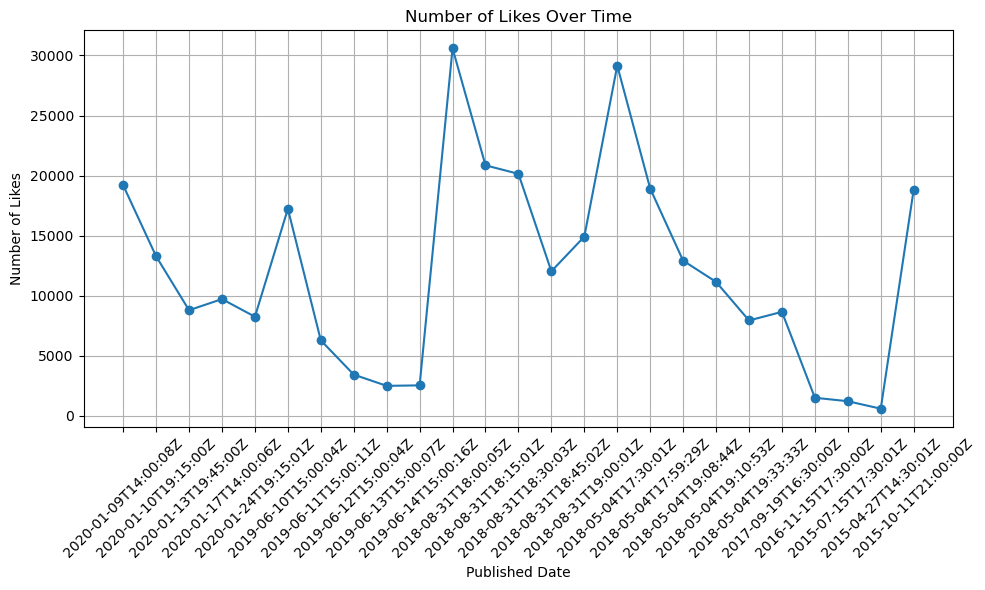

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'schafer5/schafer5.csv'
df = pd.read_csv(file_path)

# Print the column names to identify the correct ones
print(df.columns)

# Assuming your CSV has columns 'Published Date' and 'Like Count'
# Replace them with your actual column names
plt.figure(figsize=(10, 6))
plt.plot(df['Published Date'], df['Like Count'], marker='o')
plt.title('Number of Likes Over Time')
plt.xlabel('Published Date')
plt.ylabel('Number of Likes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [12]:
print(df.columns)


Index(['Video Title', 'Published Date', 'Like Count', 'View Count'], dtype='object')


In [1]:

import os
import pandas as pd
from googleapiclient.discovery import build
from config import YOUTUBE_API_KEY

def get_channel_info(api_key, channel_username):
    youtube = build("youtube", "v3", developerKey=api_key)

      # Get channel information (contentDetails, statistics)
    channel_request = youtube.channels().list(
        part='contentDetails,statistics',
        forUsername=channel_username
    )
    channel_response = channel_request.execute()

    # Check if the channel exists
    if 'items' not in channel_response or not channel_response['items']:
        print(f"Channel '{channel_username}' not found.")
        return

    # Extract channel statistics
    channel_id = channel_response['items'][0]['id']
    channel_followers = channel_response['items'][0]['statistics']['subscriberCount']
    print(f"Channel Followers: {channel_followers}")

    # Get the playlist information (contentDetails)
    playlist_request = youtube.playlists().list(
        part='contentDetails',
        channelId=channel_id
    )
    playlist_response = playlist_request.execute()

    # Check if there are playlists
    if 'items' not in playlist_response or not playlist_response['items']:
        print(f"No playlists found for the channel '{channel_username}'.")
        return

    # Extract video ids from the playlist
    video_ids = []
    for playlist_item in playlist_response['items']:
        playlist_id = playlist_item['id']
        playlist_items_request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id
        )
        playlist_items_response = playlist_items_request.execute()
        video_ids.extend([item['contentDetails']['videoId'] for item in playlist_items_response['items']])

    # Get video details (snippet, statistics)
    video_request = youtube.videos().list(
        part="snippet,statistics",
        id=','.join(video_ids)
    )
    video_response = video_request.execute()

    # Prepare data for pandas DataFrame

    # Prepare data for pandas DataFrame
    video_data = []
    for item in video_response['items']:
        video_title = item['snippet']['title']
        video_published_date = pd.to_datetime(item['snippet']['publishedAt']).date()  # Convert to date
        video_like_count = item['statistics']['likeCount']
        video_view_count = item['statistics']['viewCount']
        video_data.append({
            "Video Title": video_title,
            "Published Date": video_published_date,
            "Like Count": video_like_count,
            "View Count": video_view_count
        })

    # Create a DataFrame
    df = pd.DataFrame(video_data)

    # Save to CSV
    output_folder = channel_username
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, f"{channel_username}.csv")
    df.to_csv(output_path, index=False)

    print(f"\nVideo details saved to '{output_path}'.")

# Example usage
api_key = YOUTUBE_API_KEY
channel_username = "schafer5"
get_channel_info(api_key, channel_username)


Channel Followers: 1250000

Video details saved to 'schafer5\schafer5.csv'.


Index(['Video Title', 'Published Date', 'Like Count', 'View Count'], dtype='object')


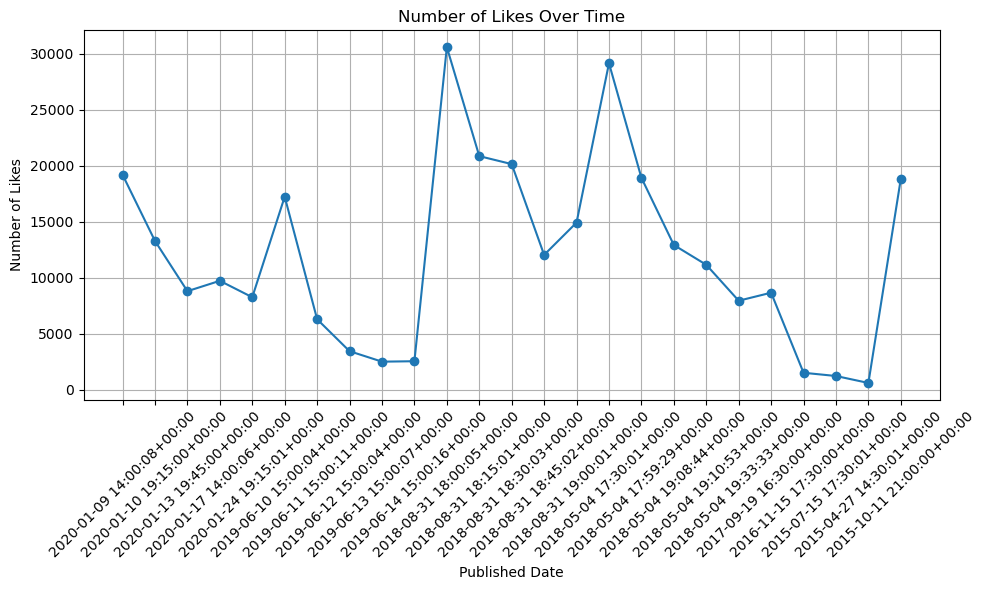

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'schafer5/schafer5.csv'
df = pd.read_csv(file_path)

# Print the column names to identify the correct ones
print(df.columns)

# Assuming your CSV has columns 'Published Date' and 'Like Count'
# Replace them with your actual column names
plt.figure(figsize=(10, 6))
plt.plot(df['Published Date'], df['Like Count'], marker='o')
plt.title('Number of Likes Over Time')
plt.xlabel('Published Date')
plt.ylabel('Number of Likes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Read the CSV file
# Load the data from the CSV file
file_path = 'schafer5/schafer5.csv'
df = pd.read_csv(file_path)
# Print column names
print(df.columns)

Index(['Video Title', 'Published Date', 'Like Count', 'View Count'], dtype='object')


In [1]:
import os
import pandas as pd
from googleapiclient.discovery import build
from config import YOUTUBE_API_KEY

def get_channel_info(api_key, channel_username):
    youtube = build("youtube", "v3", developerKey=api_key)

  
    
      # Get channel information (contentDetails, statistics)
    channel_request = youtube.channels().list(
        part='contentDetails,statistics',
        forUsername=channel_username
    )
    channel_response = channel_request.execute()

    # Check if the channel exists
    if 'items' not in channel_response or not channel_response['items']:
        print(f"Channel '{channel_username}' not found.")
        return

    # Extract channel statistics
    channel_id = channel_response['items'][0]['id']
    channel_followers = channel_response['items'][0]['statistics']['subscriberCount']
    print(f"Channel Followers: {channel_followers}")

    # Get the playlist information (contentDetails)
    playlist_request = youtube.playlists().list(
        part='contentDetails',
        channelId=channel_id
    )
    playlist_response = playlist_request.execute()

    # Check if there are playlists
    if 'items' not in playlist_response or not playlist_response['items']:
        print(f"No playlists found for the channel '{channel_username}'.")
        return

    # Extract video ids from the playlist
    video_ids = []
    for playlist_item in playlist_response['items']:
        playlist_id = playlist_item['id']
        playlist_items_request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id
        )
        playlist_items_response = playlist_items_request.execute()
        video_ids.extend([item['contentDetails']['videoId'] for item in playlist_items_response['items']])


    # Get video details (snippet, statistics)
    video_request = youtube.videos().list(
        part="snippet,statistics",
        id=','.join(video_ids)
    )
    video_response = video_request.execute()

    # Prepare data for pandas DataFrame
    video_data = []
    for item in video_response['items']:
        video_title = item['snippet']['title']
        video_published_date = item['snippet']['publishedAt']
        video_like_count = item['statistics']['likeCount']
        video_view_count = item['statistics']['viewCount']

        # Convert 'publishedAt' to datetime format and extract only date
        video_published_date = pd.to_datetime(video_published_date).date()

        video_data.append({
            "Video Title": video_title,
            "Published Date": video_published_date,
            "Like Count": video_like_count,
            "View Count": video_view_count
        })

    # Create a DataFrame
    df = pd.DataFrame(video_data)

    # Save to CSV
    output_folder = channel_username
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, f"{channel_username}.csv")
    df.to_csv(output_path, index=False)

    print(f"\nVideo details saved to '{output_path}'.")

# Example usage
api_key = YOUTUBE_API_KEY
channel_username = "schafer5"
get_channel_info(api_key, channel_username)


Channel Followers: 1250000

Video details saved to 'schafer5\schafer5.csv'.


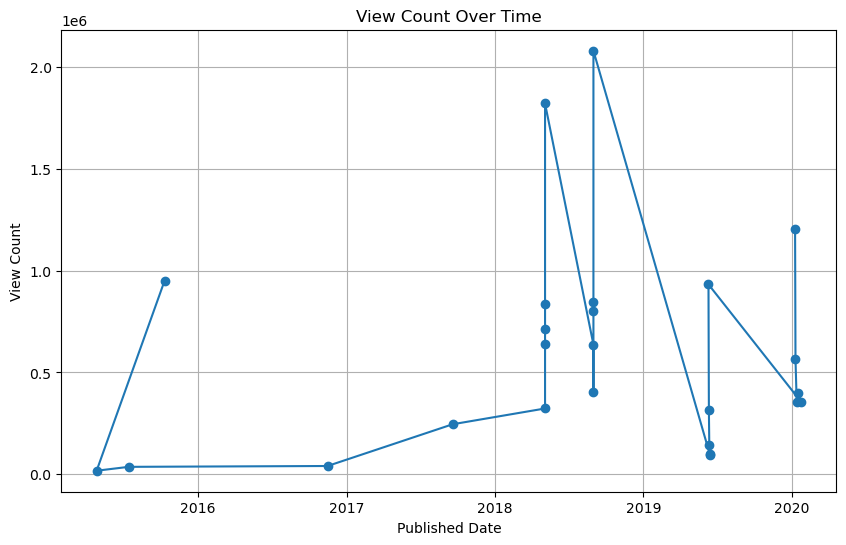

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'schafer5/schafer5.csv'
df = pd.read_csv(file_path)

# Convert the 'Published Date' column to datetime format
df['Published Date'] = pd.to_datetime(df['Published Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Published Date'], df['View Count'], marker='o')
plt.title('View Count Over Time')
plt.xlabel('Published Date')
plt.ylabel('View Count')
plt.grid(True)
plt.show()
